In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Marktkampagne.csv')

In [3]:
df.head()

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Geburtsjahr              2240 non-null   int64  
 2   Bildungsniveau           2240 non-null   object 
 3   Familienstand            2240 non-null   object 
 4   Einkommen                2216 non-null   float64
 5   Kinder_zu_Hause          2240 non-null   int64  
 6   Teenager_zu_Hause        2240 non-null   int64  
 7   Datum_Kunde              2240 non-null   object 
 8   Letzter_Kauf_Tage        2240 non-null   int64  
 9   Ausgaben_Wein            2240 non-null   int64  
 10  Ausgaben_Obst            2240 non-null   int64  
 11  Ausgaben_Fleisch         2240 non-null   int64  
 12  Ausgaben_Fisch           2240 non-null   int64  
 13  Ausgaben_Süßigkeiten     2240 non-null   int64  
 14  Ausgaben_Gold           

In [5]:
df.describe()

,ID,Geburtsjahr,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Letzter_Kauf_Tage,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,...,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1978.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1903.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1969.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1980.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1987.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2006.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Fehlende Werte pro Spalte anzeigen
print(df.isnull().sum())


ID                          0
Geburtsjahr                 0
Bildungsniveau              0
Familienstand               0
Einkommen                  24
Kinder_zu_Hause             0
Teenager_zu_Hause           0
Datum_Kunde                 0
Letzter_Kauf_Tage           0
Ausgaben_Wein               0
Ausgaben_Obst               0
Ausgaben_Fleisch            0
Ausgaben_Fisch              0
Ausgaben_Süßigkeiten        0
Ausgaben_Gold               0
Anzahl_Rabattkäufe          0
Anzahl_Webkäufe             0
Anzahl_Katalogkäufe         0
Anzahl_Ladeneinkäufe        0
Anzahl_WebBesuche_Monat     0
Kampagne_3_Akzeptiert       0
Kampagne_4_Akzeptiert       0
Kampagne_5_Akzeptiert       0
Kampagne_1_Akzeptiert       0
Kampagne_2_Akzeptiert       0
Beschwerde                  0
Z_Kontaktkostenfaktor       0
Z_Umsatzfaktor              0
Antwort_Letzte_Kampagne     0
dtype: int64


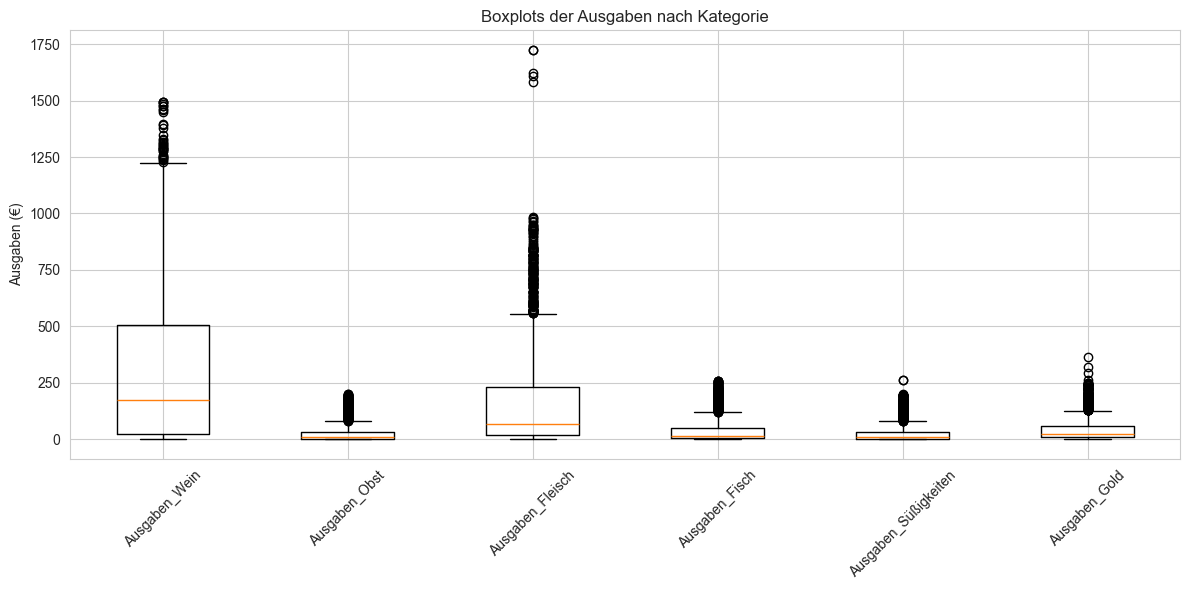

In [7]:
# Liste der gewünschten Ausgabenspalten
ausgaben_spalten = [
    'Ausgaben_Wein',
    'Ausgaben_Obst',
    'Ausgaben_Fleisch',
    'Ausgaben_Fisch',
    'Ausgaben_Süßigkeiten',
    'Ausgaben_Gold'
]

# Boxplots in einer einzigen Abbildung darstellen
plt.figure(figsize=(12, 6))
plt.boxplot([df[spalte].dropna() for spalte in ausgaben_spalten], vert=True)

# Achsenbeschriftungen und Titel
plt.xticks(ticks=range(1, len(ausgaben_spalten) + 1), labels=ausgaben_spalten, rotation=45)
plt.title('Boxplots der Ausgaben nach Kategorie')
plt.ylabel('Ausgaben (€)')
plt.grid(True)
plt.tight_layout()

# Grafik anzeigen
plt.show()


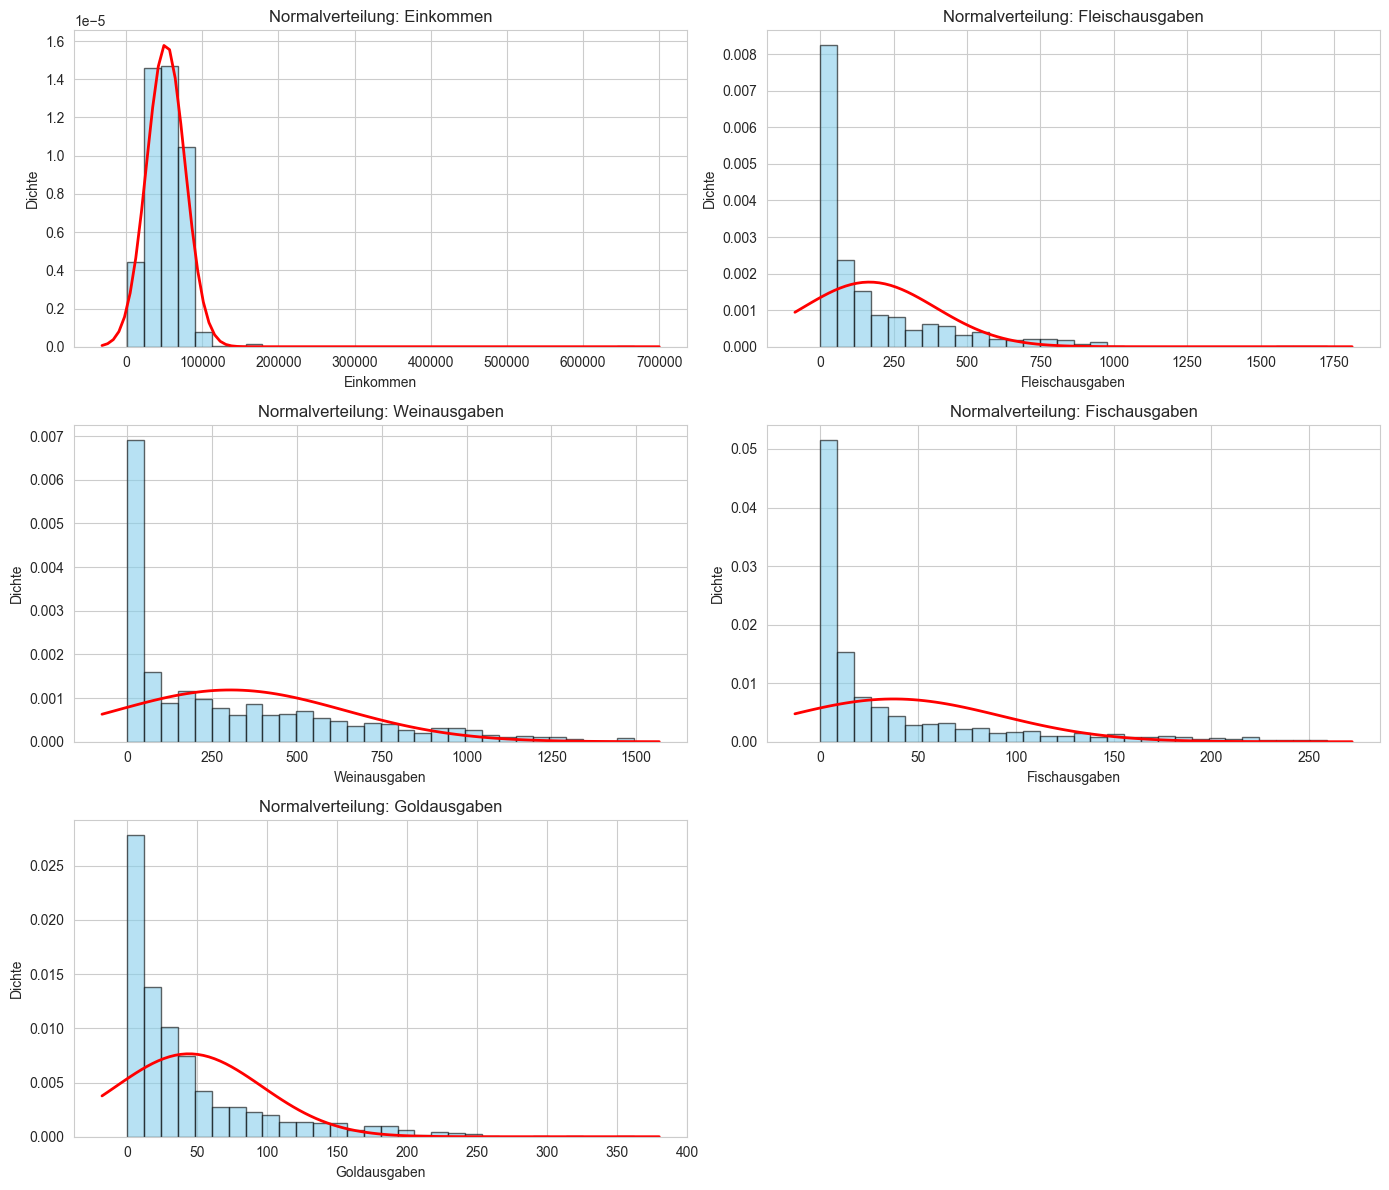

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# CSV-Datei laden
df = pd.read_csv("Marktkampagne.csv")

# Relevante Spalten
spalten = {
    "Einkommen": "Einkommen",
    "Fleischausgaben": "Ausgaben_Fleisch",
    "Weinausgaben": "Ausgaben_Wein",
    "Fischausgaben": "Ausgaben_Fisch",
    "Goldausgaben": "Ausgaben_Gold"
}

# Subplots erstellen
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

# Für jede Variable: Histogramm + Normalverteilungskurve
for i, (titel, spalte) in enumerate(spalten.items()):
    daten = df[spalte].dropna()
    mu, std = daten.mean(), daten.std()
    
    # Histogramm
    axs[i].hist(daten, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    
    # Normalverteilungskurve
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[i].plot(x, p, 'r', linewidth=2)
    
    axs[i].set_title(f'Normalverteilung: {titel}', fontsize=12)
    axs[i].set_xlabel(titel)
    axs[i].set_ylabel('Dichte')

# Leeres letztes Feld ausblenden, falls ungerade Anzahl
if len(spalten) < len(axs):
    axs[-1].axis('off')

plt.tight_layout()
plt.show()


In [9]:
# Numerische Spalten mit Median füllen
df['Einkommen'] = df['Einkommen'].fillna(df['Einkommen'].median())

# Kategorische Spalten mit dem häufigsten Wert füllen
df['Bildungsniveau'] = df['Bildungsniveau'].fillna(df['Bildungsniveau'].mode()[0])


In [10]:
# Median des 'Einkommen'-Feldes berechnen
medianwert = df['Einkommen'].median()

# Fehlende Werte in der Spalte 'Einkommen' mit dem Median ersetzen
df['Einkommen'].fillna(medianwert, inplace=True)

# Die aktualisierte Tabelle in eine neue CSV-Datei speichern
df.to_csv("Marktkampagne_ausgefüllt.csv", index=False)


In [11]:
df

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1977,Hochschulabschluss,Verheiratet,61223.0,0,1,13-06-2023,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1956,Doktor,Zusammenlebend,64014.0,2,1,10-06-2024,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1991,Hochschulabschluss,Geschieden,56981.0,0,0,25-01-2024,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1966,Master,Zusammenlebend,69245.0,0,1,24-01-2024,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
df['Alter'] = 2025 - df['Geburtsjahr']


In [13]:
df

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne,Alter
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635,...,0,0,0,0,0,0,3,11,1,58
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11,...,0,0,0,0,0,0,3,11,0,61
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426,...,0,0,0,0,0,0,3,11,0,50
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11,...,0,0,0,0,0,0,3,11,0,31
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173,...,0,0,0,0,0,0,3,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1977,Hochschulabschluss,Verheiratet,61223.0,0,1,13-06-2023,46,709,...,0,0,0,0,0,0,3,11,0,48
2236,4001,1956,Doktor,Zusammenlebend,64014.0,2,1,10-06-2024,56,406,...,0,0,0,1,0,0,3,11,0,69
2237,7270,1991,Hochschulabschluss,Geschieden,56981.0,0,0,25-01-2024,91,908,...,0,1,0,0,0,0,3,11,0,34
2238,8235,1966,Master,Zusammenlebend,69245.0,0,1,24-01-2024,8,428,...,0,0,0,0,0,0,3,11,0,59


In [14]:
# Liste der numerischen Spalten
numerische_spalten = ['Einkommen', 
'Alter', 'Letzter_Kauf_Tage','Ausgaben_Wein','Ausgaben_Obst','Ausgaben_Fleisch','Ausgaben_Süßigkeiten']


# Für jede numerische Spalte: Ausreißer erkennen und durch den Median ersetzen
for spalte in numerische_spalten:
    Q1 = df[spalte].quantile(0.25)
    Q3 = df[spalte].quantile(0.75)
    IQR = Q3 - Q1

    untere_grenze = Q1 - 1.5 * IQR
    obere_grenze = Q3 + 1.5 * IQR

    median = df[spalte].median()

    # Ausreißer durch den Median ersetzen
    df.loc[(df[spalte] < untere_grenze) | (df[spalte] > obere_grenze), spalte] = median


In [15]:
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-24', '25-34', '35-44', '45-59', '60+']
df['Altersgruppe'] = pd.cut(df['Alter'], bins=bins, labels=labels)


In [16]:
df

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne,Alter,Altersgruppe
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635.0,...,0,0,0,0,0,3,11,1,58,45-59
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11.0,...,0,0,0,0,0,3,11,0,61,60+
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426.0,...,0,0,0,0,0,3,11,0,50,45-59
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11.0,...,0,0,0,0,0,3,11,0,31,25-34
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173.0,...,0,0,0,0,0,3,11,0,34,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1977,Hochschulabschluss,Verheiratet,61223.0,0,1,13-06-2023,46,709.0,...,0,0,0,0,0,3,11,0,48,45-59
2236,4001,1956,Doktor,Zusammenlebend,64014.0,2,1,10-06-2024,56,406.0,...,0,0,1,0,0,3,11,0,69,60+
2237,7270,1991,Hochschulabschluss,Geschieden,56981.0,0,0,25-01-2024,91,908.0,...,1,0,0,0,0,3,11,0,34,25-34
2238,8235,1966,Master,Zusammenlebend,69245.0,0,1,24-01-2024,8,428.0,...,0,0,0,0,0,3,11,0,59,45-59


In [17]:
print(df['Bildungsniveau'].value_counts())

Bildungsniveau
Hochschulabschluss       1127
Doktor                    486
Master                    370
Zweiter Studienzyklus     203
Grundbildung               54
Name: count, dtype: int64


In [18]:
# Bildungsniveaus in numerische Werte umwandeln
bildungsniveau_mapping = {
    "Grundbildung": 1,
    "Zweiter Studienzyklus": 2,
    "Hochschulabschluss": 3,
    "Master": 4,
    "Doktor": 5
}

# Neue Spalte mit numerischen Werten erstellen
df["Bildungsniveau_num"] = df["Bildungsniveau"].map(bildungsniveau_mapping)

# Ergebnisse anzeigen
print(df[["Bildungsniveau", "Bildungsniveau_num"]].head())


       Bildungsniveau  Bildungsniveau_num
0  Hochschulabschluss                   3
1  Hochschulabschluss                   3
2  Hochschulabschluss                   3
3  Hochschulabschluss                   3
4              Doktor                   5


In [19]:
print(df['Familienstand'].unique())

['Ledig' 'Zusammenlebend' 'Verheiratet' 'Geschieden' 'Verwitwet' 'Allein'
 'Absurd' 'Man lebt nur einmal']


In [20]:
# Gültige Werte definieren
gueltige_werte = ["Ledig", "Zusammenlebend", "Verheiratet", "Geschieden", "Verwitwet"]

# Ungültige Werte als NaN markieren
df["Familienstand_bereinigt"] = df["Familienstand"].where(df["Familienstand"].isin(gueltige_werte), "Unbekannt")

# Ergebnis anzeigen
print(df["Familienstand_bereinigt"].value_counts())


Familienstand_bereinigt
Verheiratet       864
Zusammenlebend    580
Ledig             480
Geschieden        232
Verwitwet          77
Unbekannt           7
Name: count, dtype: int64


In [21]:
df

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne,Alter,Altersgruppe,Bildungsniveau_num,Familienstand_bereinigt
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635.0,...,0,0,0,3,11,1,58,45-59,3,Ledig
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11.0,...,0,0,0,3,11,0,61,60+,3,Ledig
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426.0,...,0,0,0,3,11,0,50,45-59,3,Zusammenlebend
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11.0,...,0,0,0,3,11,0,31,25-34,3,Zusammenlebend
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173.0,...,0,0,0,3,11,0,34,25-34,5,Verheiratet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1977,Hochschulabschluss,Verheiratet,61223.0,0,1,13-06-2023,46,709.0,...,0,0,0,3,11,0,48,45-59,3,Verheiratet
2236,4001,1956,Doktor,Zusammenlebend,64014.0,2,1,10-06-2024,56,406.0,...,1,0,0,3,11,0,69,60+,5,Zusammenlebend
2237,7270,1991,Hochschulabschluss,Geschieden,56981.0,0,0,25-01-2024,91,908.0,...,0,0,0,3,11,0,34,25-34,3,Geschieden
2238,8235,1966,Master,Zusammenlebend,69245.0,0,1,24-01-2024,8,428.0,...,0,0,0,3,11,0,59,45-59,4,Zusammenlebend


In [22]:
import pandas as pd

# Gültige Werte definieren
gueltige_werte = ["Ledig", "Zusammenlebend", "Verheiratet", "Geschieden", "Verwitwet"]

# Mapping von gültigen Werten zu numerischen Codes (beginnend mit 0)
familienstand_mapping = {
    "Ledig": 0,
    "Zusammenlebend": 1,
    "Verheiratet": 2,
    "Geschieden": 3,
    "Verwitwet": 4
}

# Ungültige Werte als "Unbekannt" markieren
df["Familienstand_bereinigt"] = df["Familienstand"].where(df["Familienstand"].isin(gueltige_werte), "Unbekannt")

# Nur gültige Werte numerisch kodieren, "Unbekannt" bleibt NaN
df["Familienstand_num"] = df["Familienstand_bereinigt"].map(familienstand_mapping)

# Ergebnis anzeigen
print(df[["Familienstand", "Familienstand_bereinigt", "Familienstand_num"]].head())


    Familienstand Familienstand_bereinigt  Familienstand_num
0           Ledig                   Ledig                0.0
1           Ledig                   Ledig                0.0
2  Zusammenlebend          Zusammenlebend                1.0
3  Zusammenlebend          Zusammenlebend                1.0
4     Verheiratet             Verheiratet                2.0


In [23]:
df

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne,Alter,Altersgruppe,Bildungsniveau_num,Familienstand_bereinigt,Familienstand_num
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635.0,...,0,0,3,11,1,58,45-59,3,Ledig,0.0
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11.0,...,0,0,3,11,0,61,60+,3,Ledig,0.0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426.0,...,0,0,3,11,0,50,45-59,3,Zusammenlebend,1.0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11.0,...,0,0,3,11,0,31,25-34,3,Zusammenlebend,1.0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173.0,...,0,0,3,11,0,34,25-34,5,Verheiratet,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1977,Hochschulabschluss,Verheiratet,61223.0,0,1,13-06-2023,46,709.0,...,0,0,3,11,0,48,45-59,3,Verheiratet,2.0
2236,4001,1956,Doktor,Zusammenlebend,64014.0,2,1,10-06-2024,56,406.0,...,0,0,3,11,0,69,60+,5,Zusammenlebend,1.0
2237,7270,1991,Hochschulabschluss,Geschieden,56981.0,0,0,25-01-2024,91,908.0,...,0,0,3,11,0,34,25-34,3,Geschieden,3.0
2238,8235,1966,Master,Zusammenlebend,69245.0,0,1,24-01-2024,8,428.0,...,0,0,3,11,0,59,45-59,4,Zusammenlebend,1.0


In [24]:
df['Kampagne_Total'] = df[['Kampagne_1_Akzeptiert','Kampagne_2_Akzeptiert','Kampagne_3_Akzeptiert','Kampagne_4_Akzeptiert','Kampagne_5_Akzeptiert']].sum(axis=1)


In [25]:
df['Kinder_Total'] = df[['Kinder_zu_Hause','Teenager_zu_Hause']].sum(axis=1)

In [26]:
df

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne,Alter,Altersgruppe,Bildungsniveau_num,Familienstand_bereinigt,Familienstand_num,Kampagne_Total,Kinder_Total
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635.0,...,3,11,1,58,45-59,3,Ledig,0.0,0,0
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11.0,...,3,11,0,61,60+,3,Ledig,0.0,0,2
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426.0,...,3,11,0,50,45-59,3,Zusammenlebend,1.0,0,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11.0,...,3,11,0,31,25-34,3,Zusammenlebend,1.0,0,1
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173.0,...,3,11,0,34,25-34,5,Verheiratet,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1977,Hochschulabschluss,Verheiratet,61223.0,0,1,13-06-2023,46,709.0,...,3,11,0,48,45-59,3,Verheiratet,2.0,0,1
2236,4001,1956,Doktor,Zusammenlebend,64014.0,2,1,10-06-2024,56,406.0,...,3,11,0,69,60+,5,Zusammenlebend,1.0,1,3
2237,7270,1991,Hochschulabschluss,Geschieden,56981.0,0,0,25-01-2024,91,908.0,...,3,11,0,34,25-34,3,Geschieden,3.0,1,0
2238,8235,1966,Master,Zusammenlebend,69245.0,0,1,24-01-2024,8,428.0,...,3,11,0,59,45-59,4,Zusammenlebend,1.0,0,1


### Korrelationsmatrix der numerischen Merkmale 

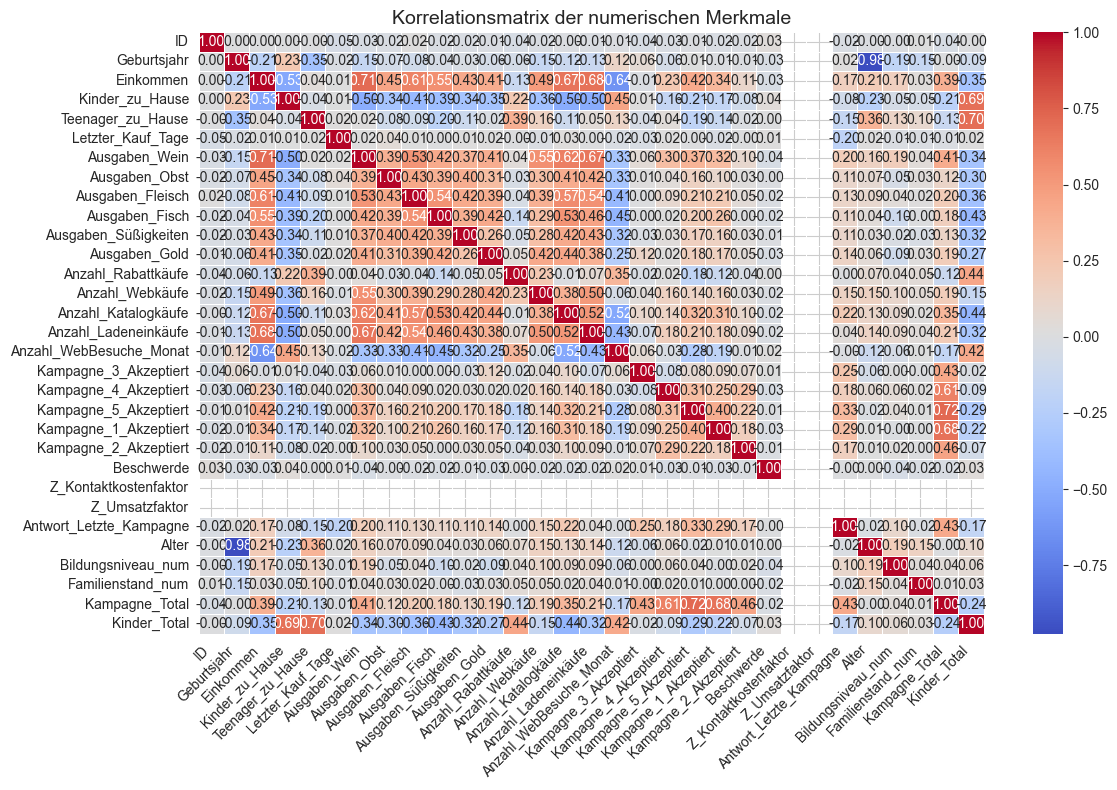

In [27]:

numerische_spalten = df.select_dtypes(include=['number'])

korrelation = numerische_spalten.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(korrelation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Korrelationsmatrix der numerischen Merkmale", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



      Was zeigt die Grafik ?
Die Werte reichen von -1 (starke negative Korrelation) bis +1 (starke positive Korrelation).
Helle Farben zeigen starke positive Zusammenhänge, dunkle Farben negative.
Die Matrix hilft dir zu erkennen, welche Merkmale möglicherweise redundant sind oder stark miteinander zusammenhängen.

In [28]:

# # Nur numerische Spalten auswählen
# numerische_spalten = df.select_dtypes(include=['number'])

# #  Korrelationen mit 'Anzahl_Katalogkäufe' berechnen
# zielvariable = 'Anzahl_Katalogkäufe'
# korrelationen = numerische_spalten.corr()[zielvariable].drop(zielvariable)

# #  Top 5 Merkmale mit höchster Korrelation (nach Absolutwert)
# top5_merkmale = korrelationen.reindex(korrelationen.abs().sort_values(ascending=False).index).head(5)

# #  Ausgabe der Top 5 Merkmale
# print("Top 5 Merkmale mit höchster Korrelation zu 'Anzahl_Katalogkäufe':\n")
# for merkmal, wert in top5_merkmale.items():
#     print(f"{merkmal}: Korrelationskoeffizient = {wert:.2f}")

# #  Scatterplots für die Top 5 Merkmale
# #for merkmal in top5_merkmale.index:
#    # plt.figure(figsize=(6, 4))
#     #sns.scatterplot(data=df, x=merkmal, y=zielvariable, alpha=0.6)
#     #plt.title(f"Scatterplot: {merkmal} vs. {zielvariable}")
#     #plt.xlabel(merkmal)
#     #plt.ylabel(zielvariable)
#     #plt.grid(True)
#     #plt.tight_layout()
#     #plt.show()


### Elbow Method zur Bestimmung der Optimalen Clusteranzahl

In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # CSV-Datei laden
# df = pd.read_csv("Marktkampagne.csv")

# # Relevante numerische Merkmale auswählen (ID und Kampagnen ausschließen)
# ausschluss_spalten = ['ID'] + [spalte for spalte in df.columns if 'Kampagne' in spalte]
# numerische_merkmale = df.select_dtypes(include=['int64', 'float64']).drop(columns=ausschluss_spalten, errors='ignore')

# # Fehlende Werte entfernen
# numerische_merkmale = numerische_merkmale.dropna()

# # Standardisierung der Merkmale
# scaler = StandardScaler()
# X_skaliert = scaler.fit_transform(numerische_merkmale)

# # Elbow-Methode zur Bestimmung der optimalen Clusteranzahl
# inertias = []
# cluster_bereich = range(1, 11)

# for k in cluster_bereich:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     kmeans.fit(X_skaliert)
#     inertias.append(kmeans.inertia_)

# # Visualisierung der Elbow-Kurve
# plt.figure(figsize=(8, 5))
# plt.plot(cluster_bereich, inertias, marker='o')
# plt.title("Elbow-Methode zur Bestimmung der optimalen Clusteranzahl")
# plt.xlabel("Anzahl der Cluster (k)")
# plt.ylabel("Inertia (Summe der quadratischen Abstände)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


#### Durchschnittliche Kampagnenakzeptanz pro Cluster

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans



# #  Relevante numerische Merkmale auswählen (ID und Kampagnen ausschließen)
# ausschluss_spalten = ['ID'] + [spalte for spalte in df.columns if 'Kampagne' in spalte]
# numerische_merkmale = df.select_dtypes(include=['int64', 'float64']).drop(columns=ausschluss_spalten, errors='ignore')

# #  Fehlende Werte mit Median auffüllen
# numerische_merkmale = numerische_merkmale.fillna(numerische_merkmale.median(numeric_only=True))

# #  Standardisierung der Merkmale
# scaler = StandardScaler()
# X_skaliert = scaler.fit_transform(numerische_merkmale)

# #  KMeans-Clustering mit 4 Clustern
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# df['Cluster'] = kmeans.fit_predict(X_skaliert)

# #  Kampagnenakzeptanz-Spalten identifizieren
# kampagnen_spalten = [spalte for spalte in df.columns if 'Kampagne_' in spalte and '_Akzeptiert' in spalte]

# #  Durchschnittliche Akzeptanz je Cluster berechnen
# akzeptanz_cluster = df.groupby('Cluster')[kampagnen_spalten].mean()

# # Gruppiertes Säulendiagramm erstellen
# akzeptanz_cluster.T.plot(kind='bar', figsize=(10, 6))
# plt.title("Durchschnittliche Kampagnenakzeptanz pro Cluster")
# plt.xlabel("Kampagne")
# plt.ylabel("Durchschnittliche Akzeptanzrate")
# plt.legend(title="Cluster")
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()


In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# #  CSV-Datei laden
# df = pd.read_csv("Marktkampagne.csv")

# #  Relevante numerische Merkmale auswählen (ID und Kampagnen ausschließen)
# ausschluss_spalten = ['ID'] + [spalte for spalte in df.columns if 'Kampagne' in spalte]
# numerische_merkmale = df.select_dtypes(include=['int64', 'float64']).drop(columns=ausschluss_spalten, errors='ignore')

# #  Fehlende Werte mit Median auffüllen
# numerische_merkmale = numerische_merkmale.fillna(numerische_merkmale.median(numeric_only=True))

# #  Standardisierung der Merkmale
# scaler = StandardScaler()
# X_skaliert = scaler.fit_transform(numerische_merkmale)

# #  KMeans-Clustering mit 4 Clustern
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# df['Cluster'] = kmeans.fit_predict(X_skaliert)

# #  PCA zur Dimensionsreduktion auf 2 Komponenten
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_skaliert)

# #  Visualisierung der Cluster in 2D
# plt.figure(figsize=(8, 6))
# streuung = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
# plt.title("KMeans-Clusteranalyse (PCA-Visualisierung)")
# plt.xlabel("PCA-Komponente 1")
# plt.ylabel("PCA-Komponente 2")
# plt.colorbar(streuung, label="Cluster")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


### Merkmale und Zielvariable ( "Features und "target variable")

In [32]:
# Notwendige Bibliotheken importieren
from sklearn.preprocessing import StandardScaler

# Numerische Merkmale definieren
numerische_merkmale = ['Einkommen', 'Alter', 'Letzter_Kauf_Tage']

# StandardScaler initialisieren
scaler = StandardScaler()

# Numerische Daten skalieren
scaled_numerical_data = scaler.fit_transform(df[numerische_merkmale])


In [33]:
numerical_features = [
    'Einkommen',
    'Alter',
    'Letzter_Kauf_Tage'
]

categorical_features = [
    'Bildungsniveau',
    'Familienstand'
                    ]

features = numerical_features + categorical_features



target_variable = 'Ausgaben_Fleisch'


In [34]:
numerical_features

['Einkommen', 'Alter', 'Letzter_Kauf_Tage']

In [35]:
X = df[features]
X

,Einkommen,Alter,Letzter_Kauf_Tage,Bildungsniveau,Familienstand
0,58138.0,58,58,Hochschulabschluss,Ledig
1,46344.0,61,38,Hochschulabschluss,Ledig
2,71613.0,50,26,Hochschulabschluss,Zusammenlebend
3,26646.0,31,26,Hochschulabschluss,Zusammenlebend
4,58293.0,34,94,Doktor,Verheiratet
...,...,...,...,...,...
2235,61223.0,48,46,Hochschulabschluss,Verheiratet
2236,64014.0,69,56,Doktor,Zusammenlebend
2237,56981.0,34,91,Hochschulabschluss,Geschieden
2238,69245.0,59,8,Master,Zusammenlebend


In [36]:
y = df[target_variable]
y

0       546
1         6
2       127
3        20
4       118
       ... 
2235    182
2236     30
2237    217
2238    214
2239     61
Name: Ausgaben_Fleisch, Length: 2240, dtype: int64

### Train-tes split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
y_test.shape

(448,)

### Skalierung und OneHotEncoding

#### Skalierung

In [39]:
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features)
scaled_numerical_df.describe()

,Einkommen,Alter,Letzter_Kauf_Tage
count,2.240000e+03,2.240000e+03,2.240000e+03
mean,8.723181e-17,2.490072e-16,-3.172066e-18
std,1.000223e+00,1.000223e+00,1.000223e+00
min,-2.427014e+00,-2.317649e+00,-1.696001e+00
25%,-7.826404e-01,-6.925417e-01,-8.671566e-01
50%,-1.208818e-02,-9.381789e-02,-3.777284e-03
75%,8.009732e-01,8.470339e-01,8.596020e-01
max,3.020583e+00,2.472141e+00,1.722981e+00


#### One Hot Encoding

In [40]:
X_train[categorical_features]

,Bildungsniveau,Familienstand
792,Hochschulabschluss,Ledig
1271,Master,Ledig
1538,Doktor,Verheiratet
668,Doktor,Verheiratet
1975,Hochschulabschluss,Verheiratet
...,...,...
1638,Hochschulabschluss,Verheiratet
1095,Hochschulabschluss,Ledig
1130,Master,Verheiratet
1294,Doktor,Ledig


In [41]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(X_train[categorical_features])

In [42]:
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns = encoder.get_feature_names_out(categorical_features))

In [43]:
encoded_categorical_df

,Bildungsniveau_Grundbildung,Bildungsniveau_Hochschulabschluss,Bildungsniveau_Master,Bildungsniveau_Zweiter Studienzyklus,Familienstand_Allein,Familienstand_Geschieden,Familienstand_Ledig,Familienstand_Man lebt nur einmal,Familienstand_Verheiratet,Familienstand_Verwitwet,Familienstand_Zusammenlebend
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1788,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
# Numerische Pipeline
numerical_pipeline = Pipeline([
    ('minmax', MinMaxScaler()),
    ('polynome', PolynomialFeatures(degree=2, include_bias=False))
])

# column transformation / Spaltentransformation
transformer = ColumnTransformer([
    ('numerical_pl', numerical_pipeline, numerical_features),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
])

# Gesamt-Pipeline
pipeline = Pipeline([
    ('col_transformer', transformer),
    ('lr_model', LinearRegression(fit_intercept=True))              # intercept = bias = y-Achsenabschnitt= beta_0
])

# model training
pipeline.fit(X_train, y_train)


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('numerical_pl',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler()),
                                                                  ('polynome',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['Einkommen', 'Alter',
                                                   'Letzter_Kauf_Tage']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Bildungsniveau',
                                                   'Familienstand'])])),
                ('lr_model', LinearRegression())])

In [45]:
# Vorhersage auf Traindaten
y_pred_train = pipeline.predict(X_train)

# Vorhersage auf Testdaten
y_pred_test = pipeline.predict(X_test)

#### Visueller Vergleich tatsächliche vs vorhergesagte Daten

Text(0, 0.5, 'Vorhersage')

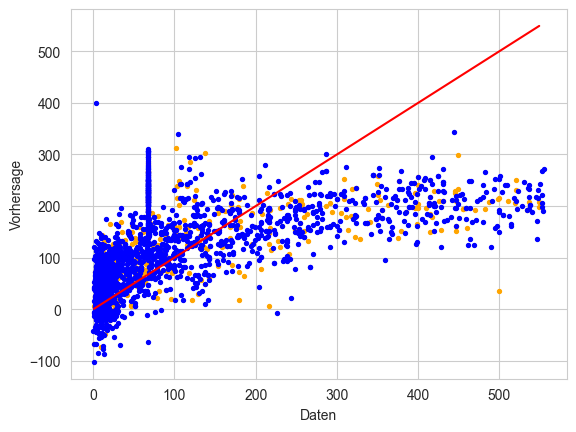

In [46]:
plt.scatter(y_test, y_pred_test, color = 'orange', s = 8)
plt.scatter(y_train, y_pred_train, color= 'blue', s = 8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel('Daten')
plt.ylabel('Vorhersage')

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse**0.5
rmse

111.83243527602822

In [49]:
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(f'R²-Score Train = {r2_train:.3f}')
print(f'R²-Score Test = {r2_test:.3f}')


R²-Score Train = 0.377
R²-Score Test = 0.382


### Logistische Regression

#### Vorbereitung : Splitten der Daten in train und test 

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
numerical_features = [
    'Einkommen',
    'Alter',
    'Letzter_Kauf_Tage'
]

categorical_features = [
    'Bildungsniveau',
    'Familienstand'
                    ]

features = numerical_features + categorical_features



target_variable = 'Antwort_Letzte_Kampagne'


In [52]:

X = df[features]
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)


In [53]:
# Pipeline mit Skalierung
transformer = ColumnTransformer([
    ('scaling', MinMaxScaler(), numerical_features),
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
])

# pipeline
classifier = Pipeline(
    [('col_transformer', transformer),
     ('lr_model', LogisticRegression())
    ])

classifier.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Einkommen', 'Alter',
                                                   'Letzter_Kauf_Tage']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Bildungsniveau',
                                                   'Familienstand'])])),
                ('lr_model', LogisticRegression())])

In [54]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [55]:
X_test

,Einkommen,Alter,Letzter_Kauf_Tage,Bildungsniveau,Familienstand
1147,54450.0,59,0,Hochschulabschluss,Zusammenlebend
2068,31761.0,31,96,Hochschulabschluss,Verheiratet
1794,34074.0,63,69,Hochschulabschluss,Zusammenlebend
1672,80141.0,29,20,Master,Verheiratet
577,13260.0,45,48,Hochschulabschluss,Verheiratet
...,...,...,...,...,...
1988,23477.0,29,39,Hochschulabschluss,Verheiratet
1772,70596.0,30,68,Hochschulabschluss,Ledig
711,55250.0,50,49,Master,Ledig
1194,43641.0,46,50,Master,Verheiratet


In [56]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Nachbereitung : Wie gut ist mein Modell ?

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Train-Metriken:')
accuracy = accuracy_score(y_train, y_pred_train)
print(f"--> Accuracy: {accuracy:.6f}")

precision = precision_score(y_train, y_pred_train, average='micro')  
print(f"--> Precision: {precision:.6f}")

recall = recall_score(y_train, y_pred_train, average='micro')
print(f"--> Recall: {recall:.6f}")

f1 = f1_score(y_train, y_pred_train, average='micro')
print(f"--> F1 Score: {f1:.6f}")


Train-Metriken:
--> Accuracy: 0.855469
--> Precision: 0.855469
--> Recall: 0.855469
--> F1 Score: 0.855469


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Test-Metriken:')
accuracy = accuracy_score(y_test, y_pred_test)
print(f"--> Accuracy: {accuracy:.6f}")

precision = precision_score(y_test, y_pred_test, average='micro')  
print(f"--> Precision: {precision:.6f}")

recall = recall_score(y_test, y_pred_test, average='micro')
print(f"--> Recall: {recall:.6f}")

f1 = f1_score(y_test, y_pred_test, average='micro')
print(f"--> F1 Score: {f1:.6f}")


Test-Metriken:
--> Accuracy: 0.845982
--> Precision: 0.845982
--> Recall: 0.845982
--> F1 Score: 0.845982


### Hier ist ein vollständiges Beispiel für ein Machine Learning Modell, das Kunden mit Abwanderungsrisiko (Churn Risk) identifiziert – basierend auf:

#### Letzter_Kauf_Tage (Zeit seit letztem Kauf)
#### Anzahl_WebBesuche_Monat (Webaktivität)

 ### Modellzusammenfassung

#### Modelltyp: Logistische Regression
#### Zielvariable: Churn_Risk (1 = gefährdet, 0 = nicht gefährdet)
#### Heuristik: Kunden mit >60 Tagen seit letztem Kauf und <2 Webbesuchen gelten als gefährdet

Konfusionsmatrix:
[[274   2]
 [  0 172]]

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       276
           1       0.99      1.00      0.99       172

    accuracy                           1.00       448
   macro avg       0.99      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448



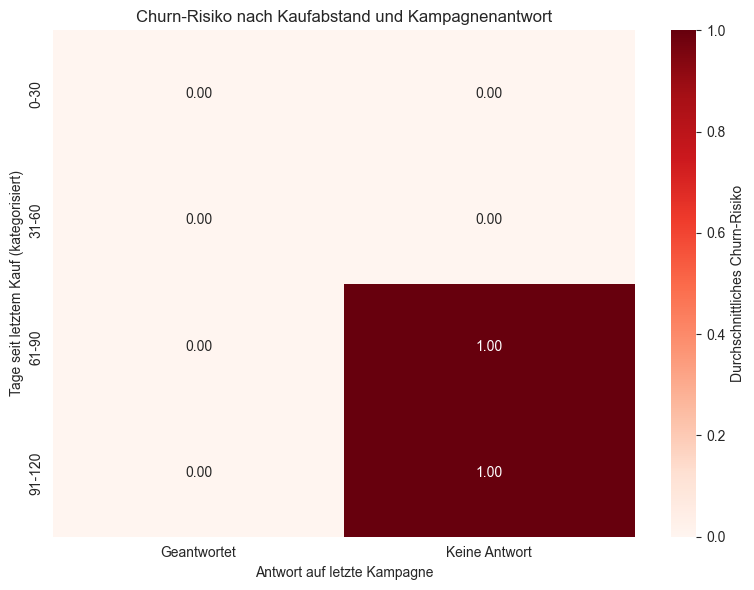

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



# Relevante Merkmale auswählen und fehlende Werte entfernen
merkmale = ['Letzter_Kauf_Tage', 'Antwort_Letzte_Kampagne']
df_modell = df[merkmale].dropna()

# Zielvariable 'Churn_Risk' erstellen:
# Kunden gelten als churn-gefährdet, wenn der letzte Kauf > 60 Tage zurückliegt
# und sie nicht auf die letzte Kampagne geantwortet haben (Antwort = 0)
df_modell['Churn_Risk'] = ((df_modell['Letzter_Kauf_Tage'] > 60) &
                           (df_modell['Antwort_Letzte_Kampagne'] == 0)).astype(int)

# Eingabemerkmale (X) und Zielvariable (y) definieren
X = df_modell[merkmale]
y = df_modell['Churn_Risk']

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistisches Regressionsmodell trainieren
modell = LogisticRegression()
modell.fit(X_train, y_train)

# Vorhersagen auf Testdaten durchführen
y_vorhersage = modell.predict(X_test)

# Konfusionsmatrix und Klassifikationsbericht ausgeben
print("Konfusionsmatrix:")
print(confusion_matrix(y_test, y_vorhersage))
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_vorhersage))

# Heatmap vorbereiten: Werte in Kategorien einteilen
df_modell['Kauf_Tage_Kategorie'] = pd.cut(df_modell['Letzter_Kauf_Tage'],
                                          bins=[0, 30, 60, 90, 120, 999],
                                          labels=['0-30', '31-60', '61-90', '91-120', '120+'])

df_modell['Antwort_Kategorie'] = df_modell['Antwort_Letzte_Kampagne'].map({0: 'Keine Antwort', 1: 'Geantwortet'})

# Pivot-Tabelle für Heatmap: Durchschnittliches Churn-Risiko
pivot = df_modell.pivot_table(index='Kauf_Tage_Kategorie',
                              columns='Antwort_Kategorie',
                              values='Churn_Risk',
                              aggfunc='mean')

# Heatmap zeichnen
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Durchschnittliches Churn-Risiko'})
plt.title("Churn-Risiko nach Kaufabstand und Kampagnenantwort")
plt.xlabel("Antwort auf letzte Kampagne")
plt.ylabel("Tage seit letztem Kauf (kategorisiert)")
plt.tight_layout()
plt.show()



Vorhergesagt: Kein Churn (0)          Vorhergesagt: Churn (1)

                                

[274 2]Tatsächlich: Kein Churn   274 korrekt erkannt                   	2 fälschlich als Churn

[0   172] Tatsächlich: Churn        0 übersehen                            	172 korrekt erkannt
 
  Genauigkeit (Accuracy):

 (274+172)/448 ≈ 0.996 = 99.6 %    → Das Modell ist insgesamt extrem präzise.


  
  Präzision für Churn (Precision):   

  172/(172+2)≈ 0.989 = 99 %        → Fast alle als churn-gefährdet eingestuften Kunden sind es auch tatsächlich.


  Sensitivität für Churn (Recall):

  172/(172+0)=1 = 100 %            → Kein churn-gefährdeter Kunde wurde übersehen.



Was bedeutet das geschäftlich?
Sehr zuverlässige Identifikation churn-gefährdeter Kunden
→ Ideal für gezielte Rückgewinnungskampagnen.

Nur 2 stabile Kunden wurden fälschlich als churn-gefährdet eingestuft
→ Geringes Risiko für unnötige Marketingkosten.

Die Kombination aus Inaktivität und fehlender Kampagnenantwort ist ein starker Prädiktor
→ Diese Merkmale sollten in zukünftigen Modellen unbedingt berücksichtigt werden.

 Fazit
Das Modell ist sehr effektiv und kann direkt im Marketing eingesetzt werden, um churn-gefährdete Kunden frühzeitig zu erkennen und gezielt anzusprechen. Es eignet sich auch als Grundlage für ein automatisiertes Frühwarnsystem.

Möchtest du das Modell erweitern, z. B. mit weiteren Merkmalen wie Einkommen oder Ausgabenverhalten?